Dataset shape: (1470, 35)

Column names: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

First few rows of the dataset:
    Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33     

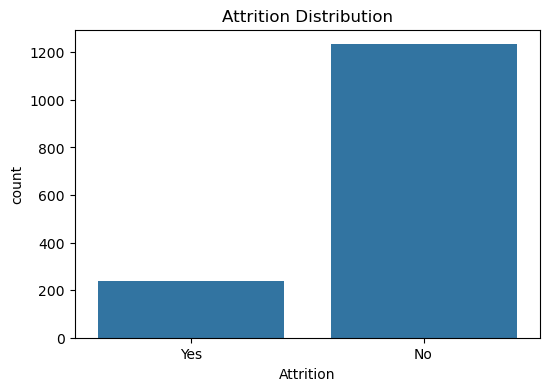

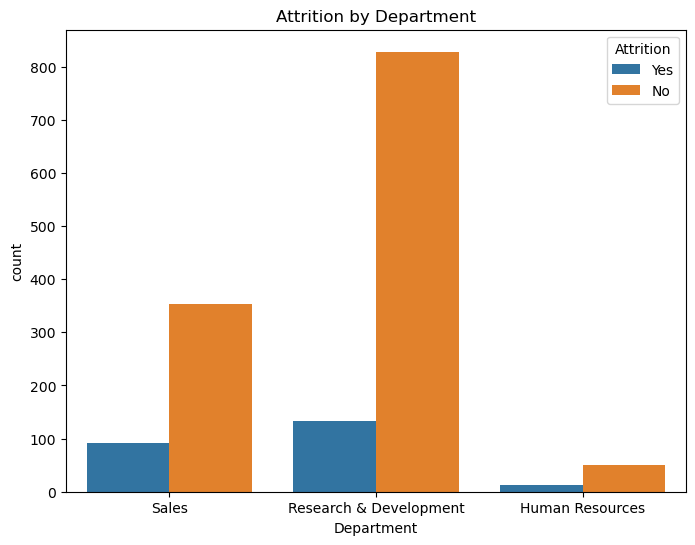

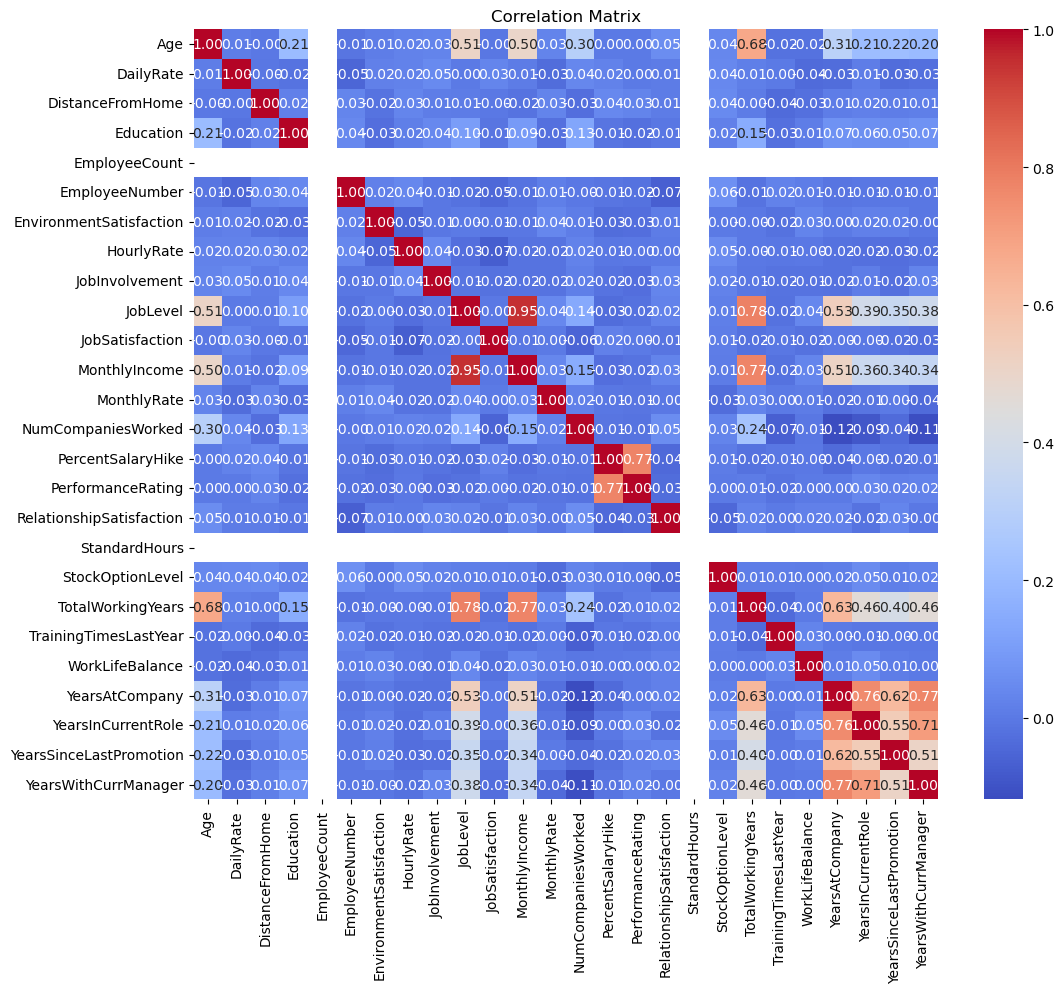

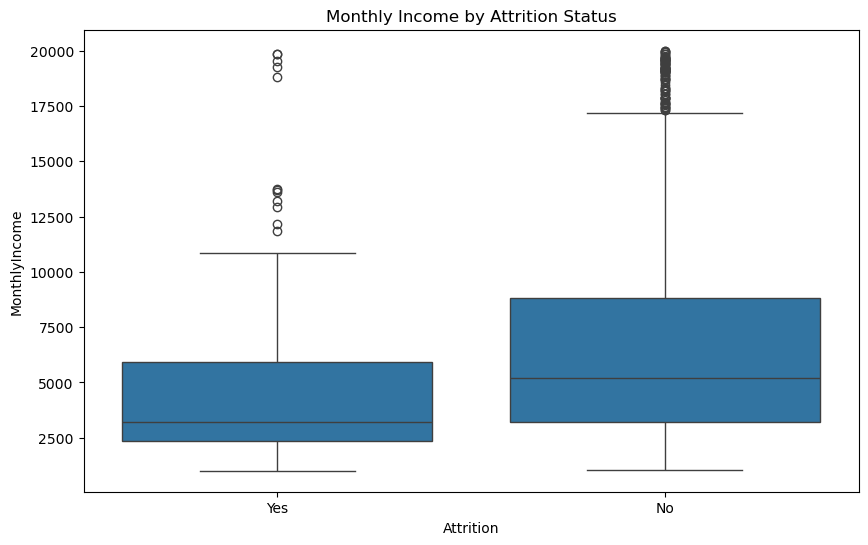

Confusion Matrix:
 [[254   1]
 [ 35   4]]

Classification Report:
               precision    recall  f1-score   support

       False       0.88      1.00      0.93       255
        True       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294


Accuracy Score: 0.8775510204081632


In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/shalinitewari/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nFirst few rows of the dataset:\n", df.head())
print("\nData types and null values:\n", df.info())

# Statistical Summary of Numeric Columns
print("\nStatistical Summary:\n", df.describe())

# Checking for Missing Values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])

# Explore Attrition Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition')
plt.title("Attrition Distribution")
plt.show()

# Analyze Attrition by Department
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title("Attrition by Department")
plt.show()

# Correlation Matrix for Numerical Features
import numpy as np

# Select only numeric columns and calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 10))
# correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Analyze the impact of Monthly Income on Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title("Monthly Income by Attrition Status")
plt.show()

# Encoding Categorical Variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Split into features and target
X = df_encoded.drop('Attrition_Yes', axis=1)
y = df_encoded['Attrition_Yes']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Classifier to predict Attrition
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
